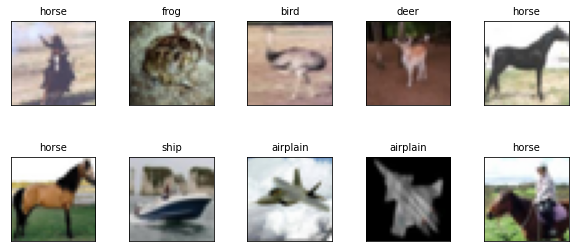

In [3]:
import sys
import random
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.datasets import cifar10

_LABELS={0:"airplain", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

def load_cifar10(num_training=40000, num_validation=10000, num_test=10000):
  # Fetch the CIFAR-10 dataset from the web
  cifar10 = keras.datasets.cifar10.load_data()
  (X_train, y_train), (X_test, y_test) = cifar10
  X_train = np.asarray(X_train, dtype=np.float32)
  y_train = np.asarray(y_train, dtype=np.int32).flatten()
  X_test = np.asarray(X_test, dtype=np.float32)
  y_test = np.asarray(y_test, dtype=np.int32).flatten()
  # Subsample the data
  # 
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  # mask = range(num_training)
  # X_train = X_train[mask]
  # y_train = y_train[mask]
  # mask = range(num_test)
  # X_test = X_test[mask]
  # y_test = y_test[mask]
  # # Normaliza the data: subtract the mean pixel and divide by std
  # mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
  # std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
  # X_train = (X_train - mean_pixel) / std_pixel
  # X_val = (X_val - mean_pixel) / std_pixel
  # X_test = (X_test - mean_pixel) / std_pixel
  # one-hot the labels
  y_train = keras.utils.to_categorical(y_train, 10)
  y_val = keras.utils.to_categorical(y_val, 10)
  y_test = keras.utils.to_categorical(y_test, 10)
  return X_train, y_train, X_val, y_val, X_test, y_test

def plot_images_labels_prediction(images, labels):
  #plot_images_labels
  fig = plt.figure('5.1 Show Train Images',figsize=(10,5))
  fig.subplots_adjust(hspace=0.0,wspace=0.4)

  for i in range(0, 10):
    ax = fig.add_subplot(2, 5, i+1)
    temp = random.randint(0,9999)
    ax.imshow(np.uint8(images[temp]))
    ax.set_title(_LABELS[list(labels[temp]).index(1)],fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([]);
  plt.show() 

if __name__ == "__main__":

  X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10()       
  plot_images_labels_prediction(X_train, y_train)